# CITS4403 PROJECT - S2 2023

## Percolation Theory

### Callum Brown (22985063)

### Section 0 - Setup

In [1]:
# some imports for plotting and mathematical calculations
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# downloads of textbook modules
# obtained from: https://github.com/AllenDowney/ThinkComplexity2/blob/master/notebooks/chap07.ipynb
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell1D.py')
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell2D.py')

In [3]:
# code obtained from: https://github.com/AllenDowney/ThinkComplexity2/blob/master/notebooks/chap07.ipynb

from scipy.signal import correlate2d
from Cell2D import Cell2D
from utils import underride, decorate, three_frame

class Percolation(Cell2D):
    """Percolation Cellular Automaton."""

    kernel = np.array([[0, 1, 0],
                       [1, 0, 1],
                       [0, 1, 0]])

    def __init__(self, n, q=0.5):
        """Initializes the attributes.

        n: number of rows
        q: probability of porousness
        """
        self.q = q
        self.array = np.random.choice([1, 0], (n, n), p=[q, 1-q])
        
        # fill the top row with wet cells
        self.array[0] = 5

    def step(self):
        """Executes one time step."""
        a = self.array
        c = correlate2d(a, self.kernel, mode='same')
        self.array[(a==1) & (c>=5)] = 5
        
    def num_wet(self):
        """Total number of wet cells."""
        return np.sum(self.array == 5)
    
    def bottom_row_wet(self):
        """Number of wet cells in the bottom row."""
        return np.sum(self.array[-1] == 5)
    
    def draw(self):
        """Draws the cells."""
        draw_array(self.array, cmap='Blues', vmax=5)
        
def draw_array(array, **options):
    """Draws the cells."""
    n, m = array.shape
    options = underride(options,
                        cmap='Greens',
                        alpha=0.7,
                        vmin=0, vmax=1, 
                        interpolation='none', 
                        origin='upper',
                        extent=[0, m, 0, n])

    plt.axis([0, m, 0, n])
    plt.xticks([])
    plt.yticks([])

    return plt.imshow(array, **options)

### Section 1.0 - Initial Configuration and Parameter Choices

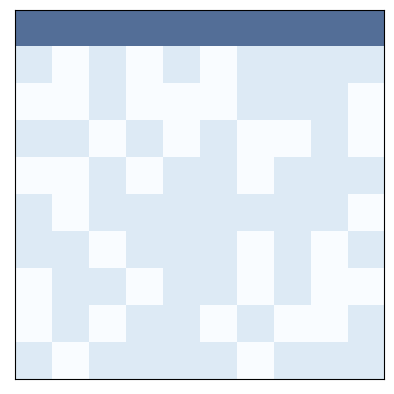

In [4]:
# parameter assignments
n = 10
q = 0.65
# have the same result each simulation for demonstration purposes.
np.random.seed(1)
perc = Percolation(n, q)
perc.draw()
# animates the process of percolation at a rate of 3.3 iterations a second.

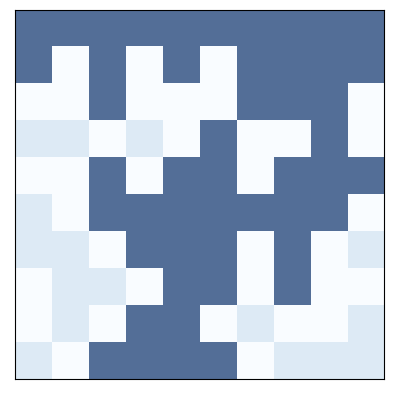

In [5]:
# an animation of the percolation process
perc.animate(frames=20, interval=0.3)

### Section 1.1 - A larger configuration

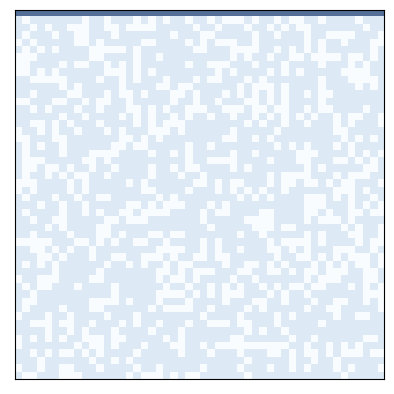

In [6]:
np.random.seed(1)
# skipped variable assignment for conciseness
# n = 50, q = 0.65
perc = Percolation(50, 0.65)
perc.draw()

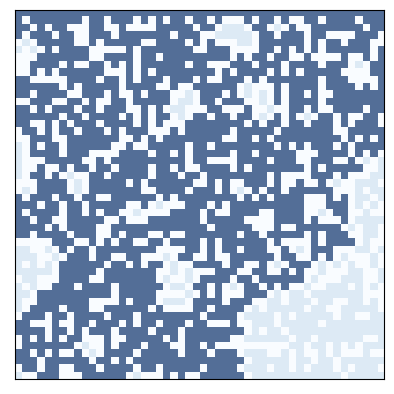

In [7]:
# increasing number of frames and iteration speed as the grid is now much larger
perc.animate(frames=120, interval=0.1)

### Section 2.0 The Forest Fire Model Setup

In [8]:
# a colourmap more suitable for a forest fire simulation
from matplotlib.colors import LinearSegmentedColormap
colors = [(0,   'white'),
          (0.2, 'Green'),
          (1, 'orange')]
    
firemap = LinearSegmentedColormap.from_list('mycmap', colors)

class PercolationPop(Cell2D):
    
    # Percolation from a Centrepoint Cellular Automaton
    kernel = np.array([[0, 1, 0],
                   [1, 0, 1],
                   [0, 1, 0]])
    
    def __init__(self, n, q=0.5):
        # initialise attributes if not provided
        # n = size of 'forest' or population
        # q = population density of the forest or geographical area
        # fire starts in centre of the grid
        self.q = q
        self.n = n
        self.array = np.random.choice([1,0], (n,n), p=[q,1-q])
        self.array[round(n/2)][round(n/2)] = 5
        
    def step(self):
        # executes an iteration
        a = self.array
        c = correlate2d(a, self.kernel, mode='same')
        # a forest cell adjacent to a fire cell catches on fire
        self.array[(a==1) & (c>=5)] = 10
        # a currently burning cell runs out of fuel and goes out in a now empty area
        self.array[(a==5)] = 0
        # convert temp burning value to actual
        self.array[(a==10)] = 5
        
    def draw(self):
        # draw the cells
        draw_array(self.array, cmap=firemap, vmax=5)
        
    def percentage_living(self):
        a = self.array
        nalive = np.count_nonzero(a == 1)
        return nalive/(self.n*self.n)

### Section 2.1 Initial Configuration and Parameter Choices of the Forest Fire Model

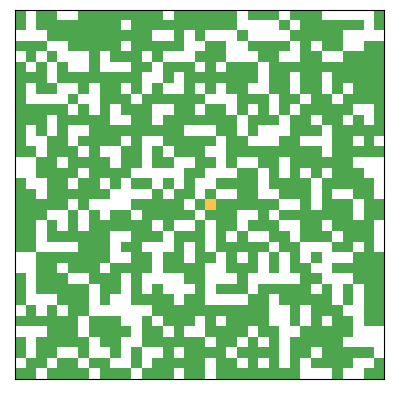

In [9]:
np.random.seed(3)
pp = PercolationPop(35, 0.65)
pp.draw()

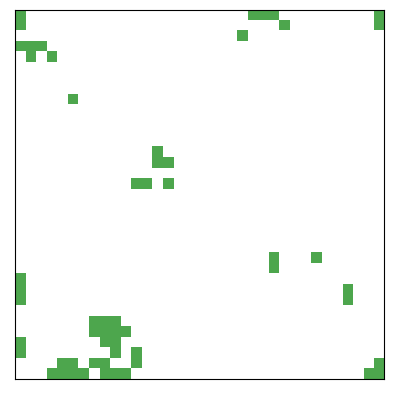

In [10]:
pp.animate(frames=150, interval=0.1)

### Section 2.2 A Larger Configuration

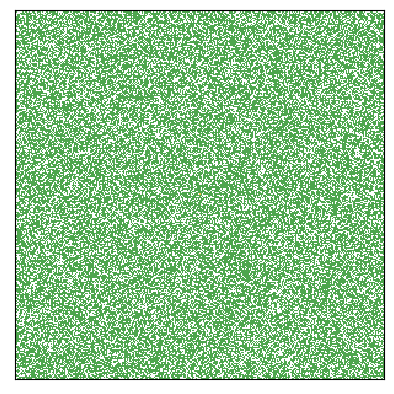

In [11]:
np.random.seed(3)
pp = PercolationPop(301, 0.65)
pp.draw()
# draws an automaton of size 301x301 with a forest density of 0.65

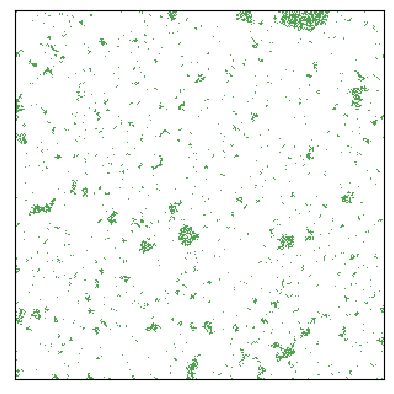

In [12]:
pp.animate(frames=600, interval=0.005)

### Section 2.3 Simulating Different q values 

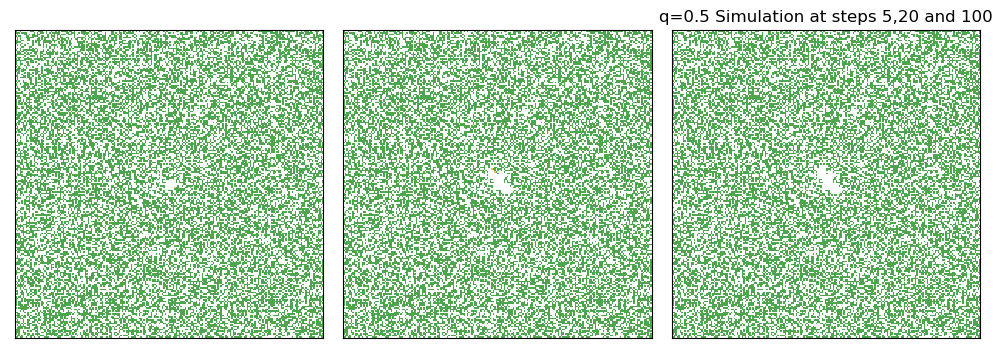

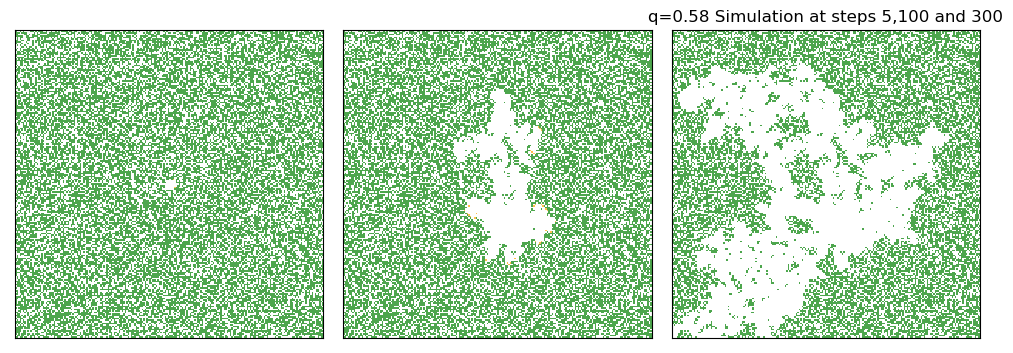

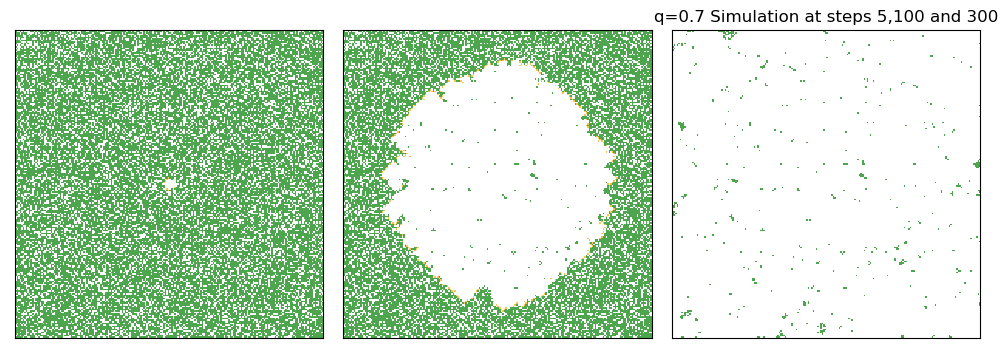

In [37]:
pp1 = PercolationPop(n=200, q=0.5)
three_frame(pp1, [5,15,50])
decorate(title="q=0.5 Simulation at steps 5,20 and 100")

pp2 = PercolationPop(n=200, q=0.58)
three_frame(pp2, [5,100,300])
decorate(title="q=0.58 Simulation at steps 5,100 and 300")

pp1 = PercolationPop(n=200, q=0.7)
three_frame(pp1, [5,100,300])
decorate(title="q=0.7 Simulation at steps 5,100 and 300")

### Section 3.0 Investigating Trends and Patterns 

mean value of the critical point of q is:  0.5918581418581418


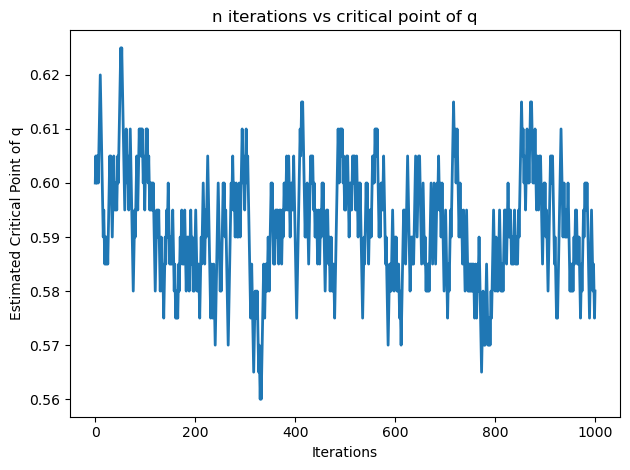

In [13]:
# code taken from textbook github as above

def test_perc(perc):
    """Run a percolation model.
    
    Runs until water gets to the bottom row or nothing changes.
    
    returns: boolean, whether there's a percolating cluster
    """
    num_wet = perc.num_wet()

    while True:
        perc.step()

        if perc.bottom_row_wet():
            return True
        
        new_num_wet = perc.num_wet()
        if new_num_wet == num_wet:
            return False

        num_wet = new_num_wet

def find_critical(n=100, q=0.6, iters=100):
    """Estimate q_crit by random walk.
    
    returns: list of q that should wander around q_crit
    """
    qs = [q]
    for i in range(iters):
        perc = Percolation(n, q)
        if test_perc(perc):
            q -= 0.005
        else:
            q += 0.005
        qs.append(q)
    return qs

np.random.seed(1)
# find the average critical point from 1000 iterations, starting at a q value of 0.6 with a constant n value of 50.
qs = find_critical(n=50, iters=1000)
plt.plot(qs)
decorate(title='n iterations vs critical point of q', xlabel='Iterations', ylabel='Estimated Critical Point of q')
q = np.mean(qs)
print("mean value of the critical point of q is: ", q)


### Section 3.1 Testing Critical Value against Population Size

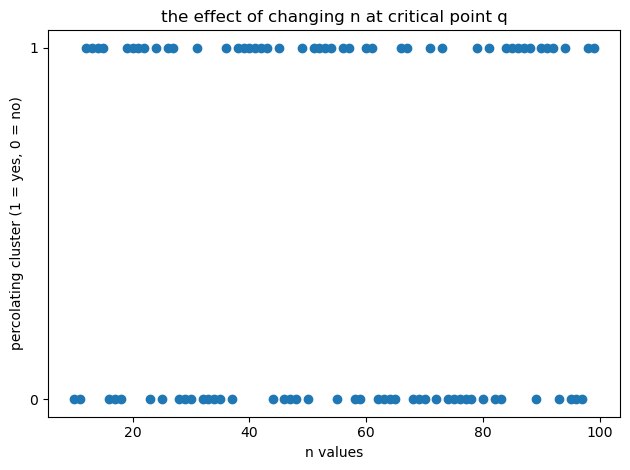

In [14]:
# test a range of n values against the a single value of q
def test_changing_n(q, nlow=10, nhigh=100):
    # store whether or not a percolating cluster occurs for each value of n
    pc = []
    nvals = []
    # loop through range of n values
    for i in range(nlow, nhigh):
        # create percolation object
        perc = Percolation(i, q)
        # if a percolating cluster occurs, store a 1 in the corresponding array
        if test_perc(perc):
            pc.append(1)
        else:
            pc.append(0)
        # store the n value in the same spot.
        nvals.append(i)
    return pc, nvals

# test the critical point value obtained in 3.0
pc, nvals = test_changing_n(q)
# scatter plot to demonstrate the relationship 
plt.scatter(nvals, pc)
decorate(title='the effect of changing n at critical point q', xlabel='n values', yticks=[0,1], ylabel='percolating cluster (1 = yes, 0 = no)')

### Section 4.0 Trends in the Forest Fire Simulation

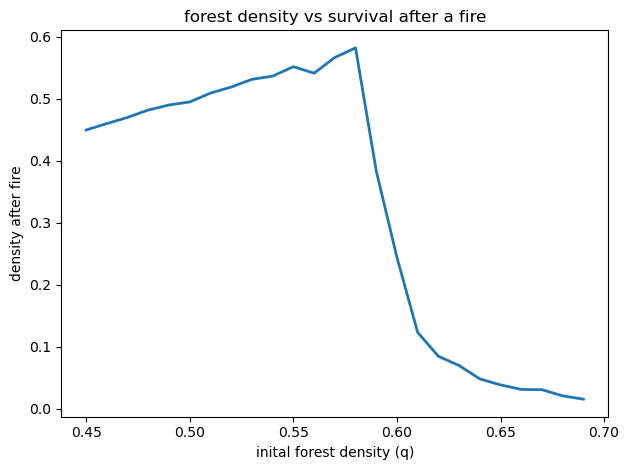

In [15]:
# burn the forest down until the fire goes out
def run_perc(perc):
    # get the initial density of the forest
    num_forest = perc.percentage_living()
    
    while True:
        # next iteration
        perc.step()
        # get the new forest density
        new_num_forest = perc.percentage_living()
        # if the new forest density is the same as the last iteration, the fire is out.
        if new_num_forest == num_forest:
            # so we return the density at this point
            return num_forest
        # if its not, we update our density and move to the next iteration
        num_forest = new_num_forest
        
# run a number of simulations with controlled size to test the effect of initial density on final density
def test_fire(n=250, qlow=0.45, qhigh=0.7):
    # arrays to store the final and initial densities
    survival_percentages = []
    densities = []
    # start the simulations at the qlow value
    i = qlow
    while i < qhigh:
        # create a percolation object with the current i value as q.
        perc = PercolationPop(n, i)
        # get the final density
        sp = run_perc(perc)
        # add it to the array
        survival_percentages.append(sp)
        # add the initial density to the other array
        densities.append(i)
        # increment q
        i += 0.01
    return survival_percentages, densities

# same result each time
np.random.seed(3)
sp, d = test_fire()
# plot the initial density against the final density
plt.plot(d, sp)
decorate(title='forest density vs survival after a fire', xlabel='inital forest density (q)', ylabel='density after fire')

### Section 4.1 The effect of changing population size on surviving forest density

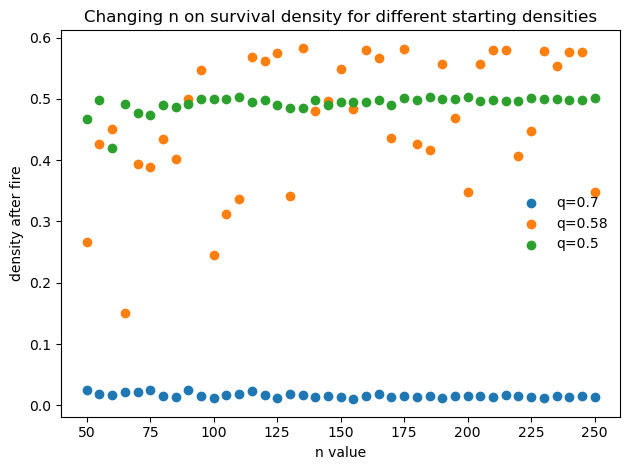

In [16]:
def test_n(q, nlow=50, nhigh=250):
    sps = []
    nvals = []
    i = nlow
    while i <= nhigh:
        perc = PercolationPop(i, q)
        sp = run_perc(perc)
        sps.append(sp)
        nvals.append(i)
        i += 5
    return sps, nvals

sps, nvals = test_n(q=0.7)
plt.scatter(nvals, sps, label='q=0.7')
sps, nvals = test_n(q=0.58)
plt.scatter(nvals, sps, label='q=0.58')
sps, nvals = test_n(q=0.5)
plt.scatter(nvals, sps, label='q=0.5')
plt.legend()
decorate(title='Changing n on survival density for different starting densities', xlabel='n value', ylabel='density after fire')